In [1]:
import osmnx as ox
from ipyleaflet import *
from IPython.display import IFrame, HTML
from shapely.geometry import LineString, mapping
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd
import networkx as nx
import plotly.graph_objects as obj
import numpy as np

C:\Anaconda3\envs\uoft\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


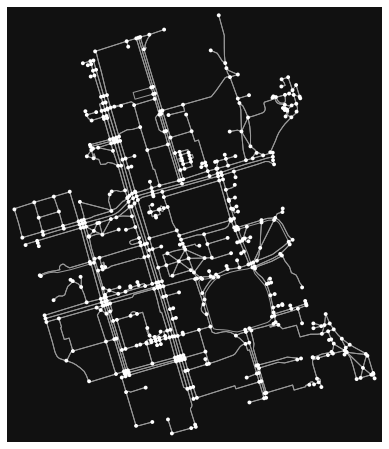

In [2]:
# creating graph from OSM
graph = ox.graph_from_place('university of toronto')
fig, ax = ox.plot_graph(graph)

In [3]:
# plotting the map usinng folium and save the graph as html file
graph_map = ox.plot_graph_folium(graph, edge_width=2)
filepath = './data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [4]:
# plotting map using ipyleaflet

center=(43.662643, -79.395689) # UofT main building
source_point = (43.664527, -79.392442)  # King Edward VII Equestrian Statue
destination_point = (43.659659, -79.397669) # Bahen Centre for Information Technology at UofT

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=False)

# King Edward VII Equestrian Statue
marker1 = Marker(name='marker1', location=source_point)

# Bahen Centre for Information Technology
marker2 = Marker(name='marker2', location=destination_point)
m.add_layer(marker1)
m.add_layer(marker2)

control = LayersControl(position='topright')
m.add_control(control)
m.add_layer(marker);
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [5]:
# converting a graph to node and/or edge GeoDataFrames.
nodes, edges = ox.graph_to_gdfs(graph)

In [6]:
# rendering graph nodes
nodes

y          x       osmid          highway  \
703098888   43.660736 -79.398219   703098888              NaN   
20979742    43.666368 -79.393159    20979742              NaN   
856205360   43.662164 -79.398309   856205360              NaN   
127289393   43.664651 -79.395768   127289393  traffic_signals   
2143494205  43.661393 -79.398524  2143494205              NaN   
...               ...        ...         ...              ...   
3210497978  43.665029 -79.394025  3210497978         crossing   
3996671930  43.662976 -79.397554  3996671930              NaN   
2143506365  43.661673 -79.392979  2143506365              NaN   
1038790590  43.665048 -79.398401  1038790590              NaN   
316884976   43.663412 -79.395249   316884976              NaN   

                              geometry  
703098888   POINT (-79.39822 43.66074)  
20979742    POINT (-79.39316 43.66637)  
856205360   POINT (-79.39831 43.66216)  
127289393   POINT (-79.39577 43.66465)  
2143494205  POINT (-79.39852 43.66139)  
...                                ...  
3210497978  POINT (-79.39402 43.66503)  
3996671930  POINT (-79.39755 43.66298)  
2143506365  POINT (-79.39298 43.66167)  
1038790590  POINT (-79.39840 43.66505)  
316884976   POINT (-79.39525 43.66341)  

[567 rows x 5 columns]

In [7]:
# rendering graph edges
edges

osmid           highway      access  oneway  \
0                          150430583              path  permissive   False   
1                            5213459         secondary         NaN   False   
2     [72016412, 72016413, 72016414]  [footway, steps]  permissive   False   
3                           34082001           footway         NaN   False   
4                           34082001           footway         NaN   False   
...                              ...               ...         ...     ...   
1578                       204344396           service  permissive   False   
1579                       204346429           footway  permissive   False   
1580                        27856686           footway  permissive   False   
1581                       501509336           footway         NaN   False   
1582                        27856686           footway  permissive   False   

      length lanes          name maxspeed  \
0     16.405   NaN           NaN      NaN   
1      4.583     4  Queen's Park       50   
2      9.395   NaN           NaN      NaN   
3      7.408   NaN           NaN      NaN   
4     12.173   NaN           NaN      NaN   
...      ...   ...           ...      ...   
1578   6.990   NaN           NaN      NaN   
1579  39.665   NaN           NaN      NaN   
1580   6.551   NaN           NaN      NaN   
1581   7.758   NaN           NaN      NaN   
1582  19.796   NaN           NaN      NaN   

                                               geometry service bridge  \
0     LINESTRING (-79.39822 43.66074, -79.39802 43.6...     NaN    NaN   
1     LINESTRING (-79.39316 43.66637, -79.39318 43.6...     NaN    NaN   
2     LINESTRING (-79.39831 43.66216, -79.39830 43.6...     NaN    NaN   
3     LINESTRING (-79.39577 43.66465, -79.39576 43.6...     NaN    NaN   
4     LINESTRING (-79.39577 43.66465, -79.39581 43.6...     NaN    NaN   
...                                                 ...     ...    ...   
1578  LINESTRING (-79.39298 43.66167, -79.39300 43.6...   alley    NaN   
1579  LINESTRING (-79.39298 43.66167, -79.39344 43.6...     NaN    NaN   
1580  LINESTRING (-79.39525 43.66341, -79.39517 43.6...     NaN    NaN   
1581  LINESTRING (-79.39525 43.66341, -79.39521 43.6...     NaN    NaN   
1582  LINESTRING (-79.39525 43.66341, -79.39530 43.6...     NaN    NaN   

               u           v  key  
0      703098888   304892018    0  
1       20979742   304890341    0  
2      856205360   774054378    0  
3      127289393   390550471    0  
4      127289393   390550470    0  
...          ...         ...  ...  
1578  2143506365  2143489693    0  
1579  2143506365  2143491963    0  
1580   316884976   305862114    0  
1581   316884976   389678150    0  
1582   316884976  3311164627    0  

[1583 rows x 14 columns]

In [8]:
# rendering the 2nd node 
list(graph.nodes(data=True))[1]

(20979742, {'y': 43.6663676, 'x': -79.3931594, 'osmid': 20979742})

In [9]:
# rendering the 1std edge
list(graph.edges(data=True))[1]

(20979742,
 304890341,
 {'osmid': 5213459,
  'lanes': '4',
  'name': "Queen's Park",
  'highway': 'secondary',
  'maxspeed': '50',
  'oneway': False,
  'length': 4.583})

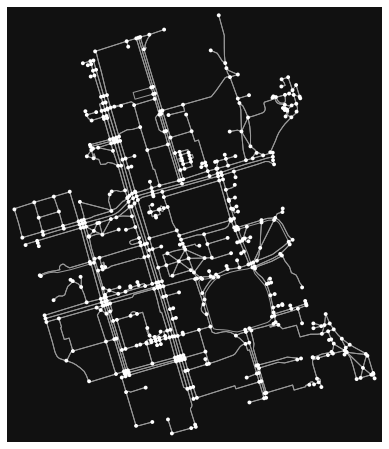

In [10]:
# Converting node and edge GeoDataFrames to a MultiDiGraph.
graph2=ox.graph_from_gdfs(nodes, edges)
ig2, ax2 = ox.plot_graph(graph2)

In [11]:
# getting the nearest nodes to the locations 
source_node = ox.get_nearest_node(graph, source_point) 
destination_node = ox.get_nearest_node(graph, destination_point)
# Render the closest node id to origin and destination points 
source_node, destination_node

(2143397656, 1633421938)

In [12]:
# finding the shortest path usuing dijkstra algorithm
route = nx.shortest_path(graph, source_node, destination_node, weight = 'length') 

In [13]:
# getting latitude and longitude of the nodes in the shortest path
longitude = [] 
latitude = []  
for i in route:
     point = graph.nodes[i]
     longitude.append(point['x'])
     latitude.append(point['y'])

In [14]:
# plotting the shortest route usning plotly
fig = obj.Figure(obj.Scattermapbox(name = "Path", mode = "lines", lat = latitude, lon = longitude, marker = {'size': 10}, line = dict(width = 4.5, color = 'blue')))

# source node
fig.add_trace(obj.Scattermapbox(name = "Source", mode = "markers", lat = [source_point[0]], lon = [source_point[1]], 
                                marker = {'size': 12, 'color':"red"}))
     
# destination node
fig.add_trace(obj.Scattermapbox(name = "Destination", mode = "markers", lat = [destination_point[0]], lon = [destination_point[1]], 
                                marker = {'size': 12, 'color':'green'}))
    
# center for plots
lat_center = np.mean(latitude)
long_center = np.mean(longitude)

# defining plot layout
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, mapbox = {'center': {'lat': lat_center, 'lon': long_center}, 'zoom': 13})
fig.show()

In [15]:
def get_layers_from_boundary(place, which_result=2, project=False, 
                             linewidth=1.5, linecolor='rgb( 100, 100, 100)'):
    
    # function that extracts a mapbox layer from the Polygon(s) defined in a 
    # geodataframe returned by  osmnx for a place
    
    geodf = ox.gdf_from_place(place, which_result=which_result)
    if project:
        geodf =  ox.project_gdf(geodf) #perform UTM projection
    b_lons = []
    b_lats = []
    coords=[]
    
    for geometry  in geodf['geometry']:
        if isinstance(geometry, (Polygon, MultiPolygon)):
            if isinstance(geometry, Polygon):
                geometry = MultiPolygon([geometry])
            for  polygon in geometry:
                x, y = polygon.exterior.xy
                b_lons.extend(list(x))
                b_lats.extend(list(y))

    for lon, lat in zip(b_lons, b_lats):
        coords.append([lon, lat])  
    
    layer=dict(sourcetype = 'geojson',
                 source={ "type": "Feature",
                     "geometry": {"type": "LineString",
                                  "coordinates": coords
                                  }
                    },
                 color= linecolor,
                 type = 'line',   
                 line=dict(width=linewidth)
            )  
    return layer

In [16]:
layer_university = get_layers_from_boundary('University of Toronto, Canada', which_result=1, linecolor='blue')
layer_toronto_city =  get_layers_from_boundary('Toronto, Canada', which_result=1, linecolor='red', linewidth=2)

C:\Anaconda3\envs\uoft\lib\site-packages\osmnx\boundaries.py:36: UserWarning:

The `boundaries` module has been deprecated and will be removed in a future relase. Use the `geocoder` module's `geocode_to_gdf` function instead.



In [17]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
(node["amenity"="restaurant"](43.66, -79.39, 44.48, -79.895);
 way["amenity"="restaurant"](43.66, -79.39, 44.48, -79.89);
 rel["amenity"="restaurant"](43.66, -79.39, 44.486, -79.89);
);
out center;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
restaurant = response.json()

In [18]:
restaurant.keys()

dict_keys(['version', 'generator', 'osm3s', 'elements'])

In [19]:
len(restaurant['elements'])

21845

In [20]:
# Extract the lon, lat and name of each restaurant:
lons = []
lats = []
text = []
for elem in restaurant['elements']:
    if elem['type'] == 'node':
        lons.append(elem['lon'])
        lats.append(elem['lat'])
        
    elif 'center' in elem:
        lons.append(elem['center']['lon'])
        lats.append(elem['center']['lat'])  
    else: pass
    if 'name'  not in elem['tags']:
        text.append('Noname')
    else:
        text.append(elem['tags']['name'])

In [21]:
# Define a scattermapbox trace
mapbox_access_token = 'mapbox_key'

In [22]:
restaurants = dict(type='scattermapbox',
                   lat=lats, 
                   lon=lons,
                   mode='markers',
                   text=text,
                   marker=dict(size=8, color='blue'),
                   hoverinfo='text',    
                   showlegend=False)

In [23]:
# plotting restaurants' location around University of Toronto
fig = obj.Figure(obj.Scattermapbox(restaurants))

# defining plot layout
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, mapbox = {'center': {'lat': lat_center, 'lon': long_center}, 'zoom': 13})
fig.show()